In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

a 0.0
0.0


Text(0.5, 1.0, 'Projectile Motion')

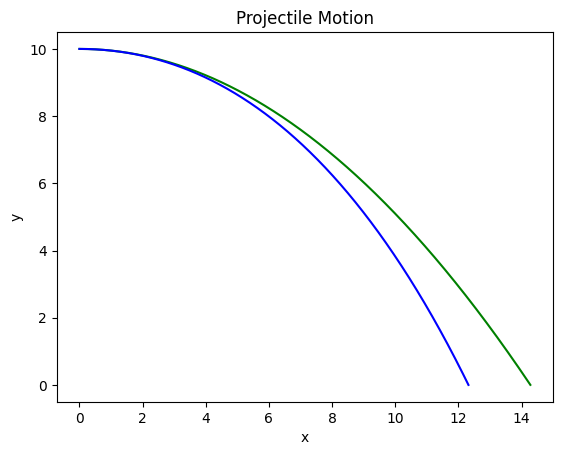

In [54]:
import numpy as np

### Initial conditions
# Position
x0 = 0
y0 = 10

# Velocity 
v0 = 10
theta = 0

# Acceleration
g = -9.81 
k = 0.3

# Time
t_min = 0
t_max = 5
dt = 0.0001
T = np.linspace(t_min,t_max,101)

def analytical_2d_motion(x0, y0, v0, theta, t_min, t_max, dt):
    """
    This function performs the analytical evaluation of an object's motion

    Args:
        x0 (float):
        y0 (float):
        v0 (float):
        theta (float):
        t_min (int):
        t_max (int):
        dt (float):

    Returns:
        X [float]: position values
        Y [float]: position values
    """
    # Perform analytical calculation of X,Y positions
    n = int((t_max-t_min) / dt) + 1
    T = np.linspace(t_min,t_max,n)
    vx0 = v0 * np.cos(theta)
    vy0 = v0 * np.sin(theta)
    print(f"a {vy0}")
    X = x0 + vx0*T
    Y = y0 + vy0*T + 0.5*g*(T**2)

    # Only return values where y > 0:
    Y = [n for n in Y if n > 0]
    X = X[:len(Y)]
    
    return X,Y

def numerical_2d_motion(x0, y0, v0, theta, t_min, t_max, dt):
    """
    This function performs the numerical evaluation of an object's motion using Euler's method

    Args:
        x0 (float):
        y0 (float):
        v0 (float):
        theta (float):
        t_min (int):
        t_max (int):
        dt (float):

    Returns:
        X [float]: position values
        Y [float]: position values
    """
    n = int((t_max-t_min) / dt) + 1

    X = np.zeros(n)
    X[0] = x0
    Y = np.zeros(n)
    Y[0] = y0

    vx = v0 * np.cos(theta)
    vy = v0 * np.sin(theta)
    print(vy)
    for i in range(1, n):       
        X[i] = X[i-1] + vx*dt 
        Y[i] = Y[i-1] + vy*dt

        ax = -k*vx
        ay = g - k*vy
        
        vx = vx + ax*dt
        vy = vy + ay*dt

        if Y[i] < 0:
            X = X[:i+1]
            Y = Y[:i+1]
            break

    return X,Y

plt.close()
X,Y = analytical_2d_motion(x0,y0,v0,theta,t_min,t_max,dt)
plt.plot(X,Y,'g')
X,Y = numerical_2d_motion(x0,y0,v0,theta,t_min,t_max,dt)
plt.plot(X,Y,'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Projectile Motion')